![PCA](../Image/PCA.png)

# Principal Component Analysis (PCA)

## ¿Qué es PCA?

El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para reducir la dimensionalidad de los datos, 
permitiendo simplificar la estructura de un conjunto de datos al capturar la mayor parte de la variabilidad en menos dimensiones. 
Esto resulta útil en aplicaciones de aprendizaje automático y visualización de datos, donde eliminar la redundancia y el ruido 
mejora la eficiencia y la interpretabilidad del modelo.

**Ejemplo**: Un dataset de múltiples características relacionadas entre sí (por ejemplo, diferentes atributos 
de un automóvil, como peso, tamaño del motor, y consumo de combustible). PCA identifica los patrones en esas relaciones y reduce 
el dataset a menos características sin perder información relevante.

## ¿En qué consiste PCA?

El objetivo de PCA es transformar los datos a un nuevo espacio de coordenadas donde cada dimensión (componente principal) representa 
la máxima variabilidad posible. Cada componente principal es una combinación lineal de las variables originales, y cada componente 
sucesivo es ortogonal (independiente) de los anteriores, maximizando la varianza en cada paso.

PCA:
1. Encuentra el "eje" en el espacio de datos que explica la mayor variabilidad (primer componente principal).
2. Encuentra un segundo eje ortogonal al primero que maximiza la variabilidad restante (segundo componente principal).
3. Repite este proceso hasta capturar la mayor parte de la varianza en un número reducido de componentes.

## Concepto Matemático

PCA utiliza conceptos de álgebra lineal para realizar la reducción de dimensionalidad. Los pasos matemáticos son los siguientes:

1. **Estandarización de los datos**: Dado que PCA es sensible a las escalas, los datos deben ser estandarizados. Si tenemos un 
   conjunto de datos de $( n )$ observaciones y $( p )$ variables, representado como una matriz $( X )$ de $( n \times p )$, 
   cada columna es transformada para tener una media de `0` y una desviación estándar de `1`.

2. **Matriz de covarianza**: La matriz de covarianza $(\Sigma)$ de los datos estandarizados $( Z )$ se calcula para entender 
   la relación entre las variables:

   $$
   \Sigma = \frac{1}{n-1} Z^T Z
   $$

   donde $( Z = X - \mu )$ y $( \mu )$ es el vector de medias de las variables.

3. **Autovalores y autovectores**: A continuación, calculamos los autovalores y autovectores de la matriz de covarianza \( \Sigma \). 
   Los autovalores indican la cantidad de varianza explicada por cada componente, mientras que los autovectores determinan la dirección 
   de estos componentes principales. Siendo $( \lambda_i )$ los autovalores y $( v_i )$ los autovectores, la relación puede expresarse como:

   $$
   \Sigma v_i = \lambda_i v_i
   $$

4. **Ordenar componentes**: Los autovalores se ordenan en orden descendente, de modo que los componentes con mayor varianza se 
   colocan primero. Esto nos permite elegir el número de componentes $( k )$ que capturen la mayor parte de la varianza acumulada.

5. **Proyección de datos**: Finalmente, los datos se proyectan en el nuevo espacio de componentes principales, donde cada dato 
   original $( x )$ se transforma en un vector de $( k )$ dimensiones, definido por:

   $$
   x_{\text{PCA}} = V_k^T \cdot Z
   $$

   donde $( V_k )$ es la matriz de autovectores seleccionados.

## Interpretación

El resultado final es un conjunto de datos reducido, donde cada componente principal es una combinación lineal de las variables 
originales que maximiza la varianza explicada. La cantidad de varianza que explica cada componente ayuda a entender qué tanto de 
la información original se retiene al reducir las dimensiones.

In [3]:
# Importacion de recursos
import os
import sys
project_path = os.path.abspath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

import pandas as pd
import matplotlib.pyplot as plt
from Services.Extract import NameDataset # Importamos el dataset Obesidad
from Services.Transforms import Transforms # Importamos la clase Transforms
from Machine.Models import Models # Importamos  la clase Models
from Services.Load import LoadData

In [4]:
col=['Age', 'Height', 'Weight','FCVC', 'NCP','CH2O','FAF', 'TUE'] # Definicion de las varaibles objeto de estudio
df = Transforms(NameDataset.Dataset_Obesidad)
df.read_df()
PCA = df.seleccionar_columnas(col)
PCA_Model = Models(PCA)

# Análisis de Selección del Número Óptimo de Componentes para PCA

Este análisis tiene como objetivo determinar el número óptimo de componentes principales a conservar en un modelo de **Análisis de Componentes Principales (PCA)**. Para ello, se han utilizado dos métodos gráficos:

1. **Método del Codo** aplicado a la varianza explicada acumulada.
2. **Coeficiente de Silueta** en función del número de componentes.

Estos métodos proporcionan información sobre la cantidad mínima de componentes necesarios para capturar la varianza en los datos, así como sobre la calidad de los clusters formados en el espacio reducido.

## 1. Método del Codo para PCA

El **Método del Codo** aplicado a la varianza explicada acumulada permite visualizar la cantidad de varianza capturada por el número de componentes principales. A medida que se agregan más componentes, la varianza explicada acumulada aumenta, pero la ganancia de varianza adicional se reduce después de cierto punto.

### Interpretación del Gráfico del Codo para PCA

En el gráfico de la izquierda, se observa la varianza explicada acumulada para diferentes números de componentes principales, desde 1 hasta 8.

- **Observación General**: A medida que se agregan más componentes, la varianza explicada acumulada se aproxima a 1 (100% de la varianza).
- **Punto de Inflexión (Codo)**: Se observa un codo alrededor de los **3 o 4 componentes**, donde la ganancia adicional en varianza explicada comienza a reducirse significativamente.

#### Conclusión del Método del Codo para PCA
El Método del Codo sugiere que **3 o 4 componentes** pueden ser suficientes para capturar la mayor parte de la varianza en los datos, reduciendo dimensionalidad sin perder información crítica. Elegir más de 4 componentes probablemente capture una varianza adicional marginal, sin proporcionar una mejora significativa.

## 2. Coeficiente de Silueta en función del Número de Componentes

El **coeficiente de silueta** mide la calidad de los clusters formados en el espacio reducido de PCA en función del número de componentes. Un valor más alto del coeficiente de silueta indica una mejor cohesión y separación de los clusters.

### Interpretación del Gráfico de Silueta

En el gráfico de la derecha, se puede observar el coeficiente de silueta para distintos números de componentes principales, de 1 a 8.

- **Observación General**: El coeficiente de silueta disminuye conforme se incrementa el número de componentes, alcanzando su valor máximo cuando solo se utiliza **1 componente**.
- **Disminución Continua**: Esto indica que, a medida que aumentamos los componentes y la dimensionalidad, la calidad de los clusters en términos de cohesión y separación se reduce.

#### Conclusión del Coeficiente de Silueta
El coeficiente de silueta indica que, para maximizar la cohesión y separación de los clusters, **es preferible un número reducido de componentes**. Sin embargo, en la práctica, la elección del número de componentes depende también del equilibrio entre la varianza explicada y la calidad de los clusters.

## Recomendación Final

Con base en los dos métodos analizados, se recomienda utilizar **entre 3 y 4 componentes principales** para capturar una buena cantidad de la varianza explicada, según el Método del Codo. No obstante, si la calidad de los clusters es una prioridad, se podría considerar utilizar solo **1 o 2 componentes** para maximizar el coeficiente de silueta, aunque esto podría implicar una pérdida de información relevante.

Esta selección de componentes permitirá reducir la dimensionalidad, manteniendo un equilibrio entre la varianza explicada y la calidad de los clusters en el espacio reducido.


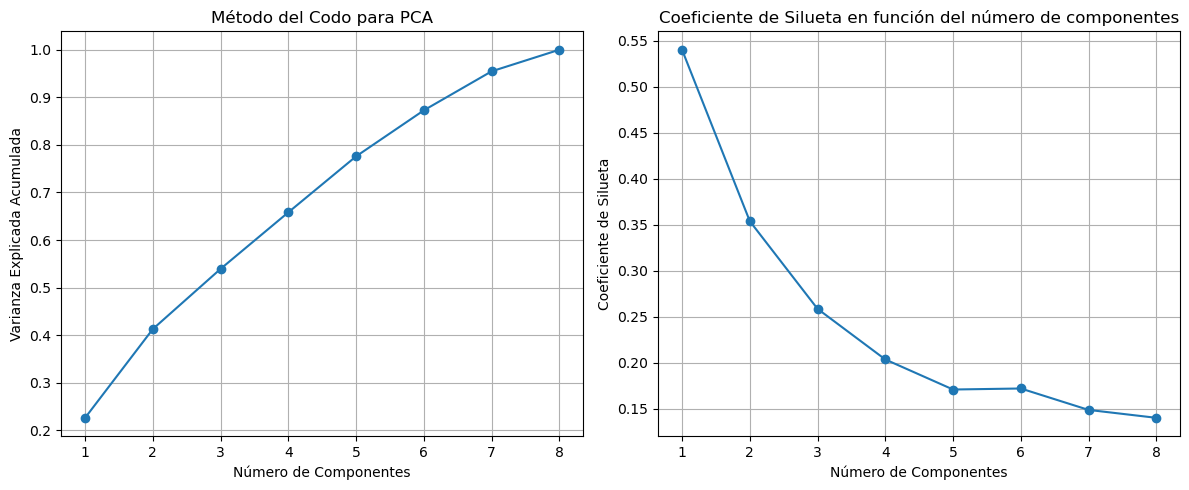

In [6]:
PCA_Model.pca_elbow_method()

In [7]:
PCA_Model.apply_pca(4)

,PC1,PC2,PC3,PC4
0,-1.333029,-0.689743,-0.305922,-0.733236
1,-0.087728,-0.727529,2.067507,2.956012
2,0.828980,-1.305978,-0.898384,0.475035
3,1.305491,0.572544,0.366069,1.250744
4,-0.690310,0.842111,-0.478263,-0.111392
...,...,...,...,...
2106,1.308977,0.050855,0.890030,-0.685840
2107,1.637764,0.536557,0.793394,-0.596949
2108,1.720038,0.508361,0.780803,-0.560407
2109,2.029482,0.788680,1.045579,-0.377248



# Análisis de Selección de la Cantidad Óptima de Clusters para K-means

Este análisis tiene como objetivo determinar la cantidad óptima de clusters para el modelo de **K-means**. Para ello, se han utilizado dos métodos complementarios:

1. **Método del Coeficiente de Silueta**
2. **Método del Codo (Inercia)**

Ambos métodos proporcionan información útil sobre la cohesión y separación de los clusters, así como la compacidad de los mismos, lo cual permite seleccionar el número de clusters que mejor representa la estructura de los datos.

## 1. Método del Coeficiente de Silueta

El **coeficiente de silueta** es una métrica que mide la calidad de los clusters en función de la **cohesión** y **separación**. Este valor varía entre -1 y 1:
- **Valores cercanos a 1** indican que los puntos están bien asignados a sus clusters y lejos de otros clusters.
- **Valores cercanos a 0** sugieren que los puntos están en los límites entre clusters.
- **Valores negativos** significan que los puntos podrían estar asignados al cluster equivocado.

### Interpretación del Gráfico de Silueta

En el gráfico de la izquierda, se puede observar el coeficiente de silueta para diferentes números de clusters, desde 2 hasta 10.

- **Observación General**: El coeficiente de silueta aumenta conforme se incrementa el número de clusters.
- **Pico en el Coeficiente de Silueta**: El valor más alto se observa en `k=10`, con un coeficiente de silueta de aproximadamente 0.18.
  
#### Conclusión del Coeficiente de Silueta
El coeficiente de silueta sugiere que una cantidad de clusters más alta podría ofrecer una mejor separación, ya que el valor más alto de la silueta ocurre en `k=10`. Sin embargo, un coeficiente de silueta relativamente bajo (0.18) indica que puede haber cierta superposición entre clusters, y el modelo de K-means podría no ser ideal para estos datos.

## 2. Método del Codo (Inercia)

El **método del codo** se basa en la **inercia** del modelo, que mide la **compacidad** de los clusters (es decir, la suma de las distancias cuadradas entre los puntos y el centroide de sus clusters). La inercia disminuye al aumentar el número de clusters, ya que los puntos se agrupan en conjuntos más pequeños.

### Interpretación del Gráfico del Codo

En el gráfico de la derecha, se puede observar la inercia para distintos valores de `k` (número de clusters) entre 2 y 10.

- **Inercia decreciente**: A medida que aumenta `k`, la inercia disminuye, lo cual es un comportamiento esperado en K-means.
- **Punto de inflexión (Codo)**: No se observa un "codo" muy marcado en el gráfico, pero hay una reducción considerable de la inercia hasta `k=4`, después de lo cual la disminución es más gradual.

#### Conclusión del Método del Codo
La falta de un codo claro indica que podría no haber un número de clusters claramente óptimo en estos datos. Sin embargo, se observa que la disminución de la inercia es menos pronunciada después de `k=4`, lo cual sugiere que aumentar el número de clusters más allá de 4 podría no mejorar significativamente la compacidad de los clusters.

## Recomendación Final

Con base en los dos métodos, se pueden hacer las siguientes observaciones para seleccionar el número óptimo de clusters:

1. **Coeficiente de Silueta**: Sugiere que `k=10` maximiza la cohesión y separación de los clusters, pero el valor absoluto de la silueta es bajo (0.18), indicando que los datos podrían no estar bien estructurados para un modelo de K-means.
2. **Método del Codo**: Sugiere un punto de inflexión leve alrededor de `k=4`, lo que implica que aumentar el número de clusters más allá de este punto tiene beneficios limitados en cuanto a la reducción de inercia.

### Elección del Número de Clusters
Dado que los métodos no muestran un número óptimo claramente, se sugiere probar con **4 clusters** (de acuerdo con el método del codo) y evaluar el desempeño del modelo. Alternativamente, si se requiere un análisis más detallado, se puede optar por **10 clusters** para maximizar la silueta, aunque esto podría resultar en una estructura de clusters menos clara.


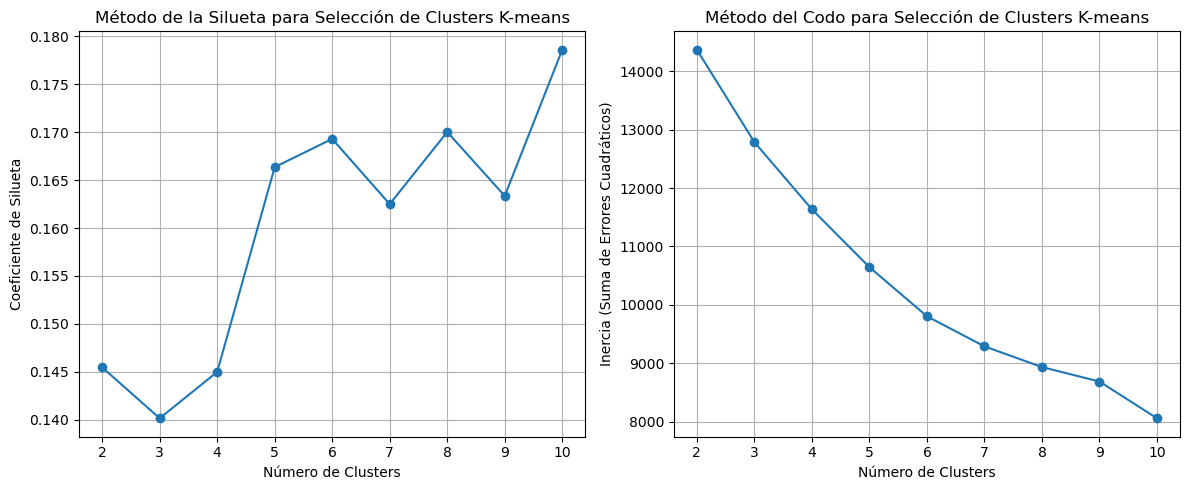

In [9]:
PCA_Model.kmeans_silhouette_and_elbow()

In [10]:
df_clusters, metrics = PCA_Model.apply_kmeans(n_clusters=4,random_state=42,use_pca=True)

In [11]:
# DataFrame con los resultados del PCA
df_clusters

,PC1,PC2,PC3,PC4,Cluster
0,-1.333029,-0.689743,-0.305922,-0.733236,3
1,-0.087728,-0.727529,2.067507,2.956012,3
2,0.828980,-1.305978,-0.898384,0.475035,1
3,1.305491,0.572544,0.366069,1.250744,0
4,-0.690310,0.842111,-0.478263,-0.111392,2
...,...,...,...,...,...
2106,1.308977,0.050855,0.890030,-0.685840,0
2107,1.637764,0.536557,0.793394,-0.596949,0
2108,1.720038,0.508361,0.780803,-0.560407,0
2109,2.029482,0.788680,1.045579,-0.377248,0


# Análisis de Resultados de K-means en Conjuntos de Entrenamiento y Prueba

Este documento presenta un análisis de los resultados obtenidos al aplicar el modelo de **K-means** en los conjuntos de entrenamiento y prueba. Se utilizan dos métricas clave para evaluar la calidad del clustering en ambos conjuntos:

1. **Coeficiente de Silueta**: Indica la cohesión y separación de los clusters.
2. **Inercia**: Mide la compacidad de los clusters.

Estas métricas permiten evaluar la efectividad del modelo de clustering tanto en el conjunto de entrenamiento como en el de prueba.

## Resultados de las Métricas

Los resultados obtenidos para el modelo de K-means con el número de clusters seleccionado son los siguientes:

- **Coeficiente de Silueta en Entrenamiento**: 0.2237
- **Inercia en Entrenamiento**: 4304.53
- **Coeficiente de Silueta en Prueba**: 0.2247
- **Inercia en Prueba**: 1817.73

### 1. Análisis del Coeficiente de Silueta

El **coeficiente de silueta** es una métrica que varía entre -1 y 1 y mide la calidad del clustering en función de la cohesión y separación:

- **Valores cercanos a 1** indican que los puntos están bien asignados a sus clusters y alejados de otros clusters.
- **Valores cercanos a 0** sugieren que los puntos están en los límites entre clusters.
- **Valores negativos** indican que los puntos podrían estar asignados al cluster incorrecto.

#### Interpretación del Coeficiente de Silueta
Los coeficientes de silueta obtenidos son:

- **Entrenamiento**: 0.2237
- **Prueba**: 0.2247

Estos valores son relativamente bajos, lo que sugiere que los clusters no están claramente definidos, y puede haber superposición entre clusters. Sin embargo, la similitud entre los valores de entrenamiento y prueba indica una consistencia en la calidad del clustering en ambos conjuntos.

### 2. Análisis de la Inercia

La **inercia** mide la compacidad de los clusters, calculando la suma de las distancias cuadradas de cada punto a su centroide. Valores más bajos indican clusters más compactos y bien definidos.

#### Interpretación de la Inercia
Los valores de inercia obtenidos son:

- **Entrenamiento**: 4304.53
- **Prueba**: 1817.73

La inercia en el conjunto de prueba es significativamente menor que en el conjunto de entrenamiento, lo cual es esperado, ya que el conjunto de prueba contiene menos datos. La diferencia entre estos valores no es tan grande, lo que indica que el modelo mantiene cierta consistencia en la compacidad de los clusters entre ambos conjuntos.

## Conclusiones

Los resultados indican que:

1. **Coeficiente de Silueta Bajo**: La calidad del clustering en términos de cohesión y separación es baja, lo cual puede ser indicativo de clusters no claramente definidos.
2. **Consistencia entre Entrenamiento y Prueba**: Tanto el coeficiente de silueta como la inercia son consistentes entre el conjunto de entrenamiento y prueba, lo cual sugiere que el modelo de K-means tiene un rendimiento similar en ambos conjuntos.

En general, estos resultados indican que, aunque los clusters no son perfectamente separados, el modelo es consistente entre los conjuntos de entrenamiento y prueba. Se podría considerar ajustar el número de clusters o aplicar técnicas adicionales de preprocesamiento para mejorar la definición de los clusters.


In [13]:
# Resultado del entrenamiento
metrics

,Silhouette,Inertia
Train,0.223709,4304.531921
Test,0.224722,1817.726681



# Análisis de Clustering después de PCA

Este gráfico 3D muestra los resultados de clustering utilizando el modelo de **K-means** aplicado sobre los datos después de reducir la dimensionalidad mediante **Análisis de Componentes Principales (PCA)**. La visualización emplea tres componentes principales (`PC1`, `PC2`, y `PC3`), permitiendo observar cómo se agrupan los datos en un espacio tridimensional reducido.

## Detalles del Gráfico

- **Componentes Principales en los Ejes**:
  - **Eje X**: Representa el primer componente principal (`PC1`), que captura la mayor varianza posible de los datos.
  - **Eje Y**: Representa el segundo componente principal (`PC2`), que captura la siguiente mayor cantidad de varianza.
  - **Eje Z**: Representa el tercer componente principal (`PC3`), que captura la tercera mayor cantidad de varianza.

- **Colores de los Clusters**:
  - Los puntos en el gráfico están coloreados de acuerdo con los clusters asignados por K-means, permitiendo visualizar la separación entre clusters en el espacio de los tres primeros componentes principales.

- **Ángulos de Vista**:
  - La vista está configurada con un ángulo de **elevación de 70°** y un **azimuth de 135°**, lo que proporciona una perspectiva que permite visualizar la dispersión de los clusters en los tres ejes (PC1, PC2 y PC3).

## Interpretación del Gráfico

1. **Separación de Clusters**:
   - La separación entre los clusters es observable en el gráfico 3D, donde los diferentes colores representan grupos distintos. Sin embargo, es importante evaluar visualmente si existe una clara división entre los clusters o si algunos están mezclados o solapados, lo que indicaría menor cohesión en la agrupación.

2. **Cohesión dentro de los Clusters**:
   - Un buen clustering debería mostrar puntos agrupados cerca unos de otros dentro del mismo cluster. En el gráfico, se puede observar que algunos clusters parecen más compactos, mientras que otros están más dispersos.
   - Este patrón puede reflejar que ciertos clusters están bien definidos y otros podrían tener más variabilidad dentro del grupo.

3. **Estructura del Espacio Reducido**:
   - La reducción de dimensionalidad mediante PCA permite visualizar los datos en un espacio de menor dimensionalidad, conservando la mayor cantidad de información posible. Los tres primeros componentes principales (`PC1`, `PC2`, `PC3`) capturan la mayor parte de la varianza en los datos, lo cual debería preservar la estructura general de los datos y facilitar la identificación de patrones de clustering.
   - La disposición de los clusters en este espacio reducido indica cómo se distribuyen los datos en términos de los patrones más fuertes.

4. **Perspectiva de los Ángulos de Vista**:
   - Los ángulos de elevación y azimuth configurados en 70° y 135° respectivamente proporcionan una vista que equilibra la observación de los tres componentes. Si fuera necesario explorar la estructura desde otros ángulos, modificar estos valores puede ofrecer una mejor percepción de la disposición tridimensional.

## Conclusión del Análisis de Clusters después de PCA

- **Calidad del Clustering**: A juzgar por la separación de colores y la distribución de los puntos, se puede hacer una evaluación preliminar sobre la efectividad del modelo de K-means en el espacio reducido de PCA.
  - Si los clusters muestran separación clara y están bien agrupados, esto indicaría que K-means es capaz de identificar patrones significativos en los datos.
  - Si los clusters están muy solapados, esto podría sugerir que los datos no tienen una estructura claramente diferenciada o que se necesita ajustar el número de clusters.

- **Importancia del PCA**: La reducción de dimensionalidad mediante PCA ha permitido representar los datos en tres dimensiones, manteniendo la mayoría de la varianza de los datos originales. Este enfoque facilita la interpretación de los resultados de clustering y permite detectar patrones complejos que serían difíciles de visualizar en espacios de mayor dimensión.

- **Recomendaciones**: Basado en esta visualización, sería útil:
  - **Experimentar con otros números de clusters** para ver si se logra una mejor separación.
  - **Probar con otros ángulos de vista** para analizar mejor la disposición de los clusters en el espacio.
  - **Evaluar métricas cuantitativas** como el coeficiente de silueta y la inercia para confirmar si los clusters están bien definidos en el espacio tridimensional.

Este análisis proporciona una comprensión visual de cómo el modelo de K-means organiza los datos en el espacio reducido por PCA, lo cual es útil para evaluar la calidad y la estructura de los clusters formados.


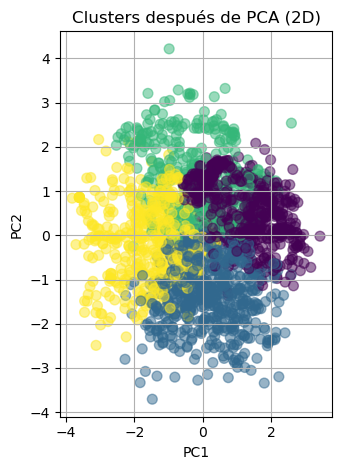

In [15]:
PCA_Model.plot_clusters_comparison(component_1='PC1', component_2='PC2')

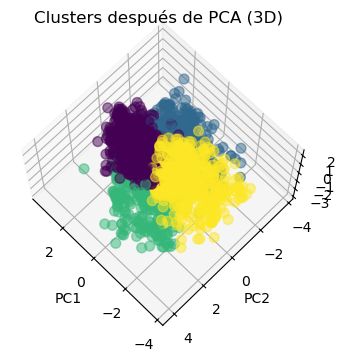

In [16]:
PCA_Model.plot_clusters_comparison(component_1='PC1', component_2='PC2', component_3='PC3', elevation_azimuth=(70, 135))

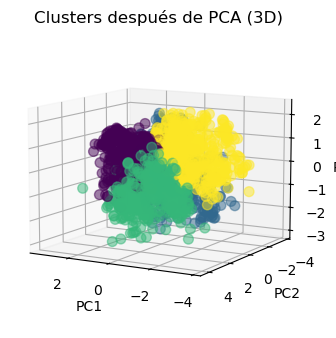

In [17]:
PCA_Model.plot_clusters_comparison(component_1='PC1', component_2='PC2', component_3='PC3', elevation_azimuth=(10, 120))

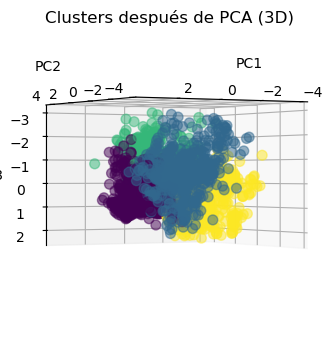

In [18]:
PCA_Model.plot_clusters_comparison(component_1='PC1', component_2='PC2', component_3='PC3', elevation_azimuth=(-180, 120))

## Exportacion de los resultados

In [19]:
save = LoadData(datos=df_clusters,full_path='..\Temps')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\kmi_J\AppData\Local\Temp\ipykernel_6616\1077182901.py:1: SyntaxWarning: invalid escape sequence '\T'
  save = LoadData(datos=df_clusters,full_path='..\Temps')


In [20]:
save.load_data(name_file='clusters',type_file='plano',date_=False,index=True)